## Bear Populations

    The scenatio in this lab is motivated by the Great Smoky Mountain National Park. It's considered the bear population in a "generic park" and in the "human-populated" areas. There areas share morders. The emigration and imigration is bases on the connectivity of the patches.    

Let $r$ the population growth rate of the bears, which will be assumed to be the same in the park in the park and the forest. 

Let $K$ be the capacity. 

Let $m_p$ the proportion of the park boundary connected with the forest. 

Let $m_f$ the proportion of the forest boundary connecter with the park.

Let $P(t), F(t), O(t)$ the bear density in the park, forest and outside regions. 

Let $u_p(t), u_f(t)$ the rates of bear harvesting :(

We wish to minimizr bear-human encounters. 

$$ \min_{u_p, u_f} \int_0^T O(t) + c_pu_p(t)^2 + c_fu_f(t)^2 dt $$

$$subject~to~P'(t) = rP(t) - \frac{r}{K}P(t)^2 + \frac{m_fr}{K}(1 - \frac{P(t)}{K})F(t)^2 - u_p(t)P(t),$$
$$F'(t) = rF(t) - \frac{r}{K}F(t)^2 + \frac{m_pr}{K}(1 - \frac{F(t)}{K})P(t)^2 - u_f(t)F(t),$$
$$O'(t) = r(1 - m_p)\frac{P(t)^2}{K} + r(1 - m_f)\frac{F(t)^2}{K} + \frac{m_fr}{K^2}P(t)F(t)^2 + \frac{m_pr}{K^2}P(t)^2F(t),$$

$$P(0) = P_0 \geq 0, F(0) = F_0 \geq 0, O(0) = O_0 \geq 0, $$
$$0 \leq u_p(t) \leq 1, 0 \leq u_f(t) \leq 1 $$

The term $\frac{r}{K}P(t)^2$ represents the density-dependent emigration. This means that the growth in emigration depends on the density. The third term in first equation is the density-dependent immigration from the forest. THe last two terms in the third equation are, respectively, the portion of the emigrating population from the park rhar enters the forest but is forced to leave because  of the density-dependence, and the portion entering the park from the forest that is forced to leave. 

##### Importing modules

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing(use_unicode = True)

In [2]:
P, F, O, uf, up, l1, l2, l3, cp, cf, r, K, mf, mp, t = sp.symbols('P F O uf up l1 l2 l3 cp cf r K mf mp t')

#### The Hamiltonian 

$H(t, \vec{x}, \vec{u}, \vec{\lambda}) = - O(t) - c_pu_p(t)^2 - c_fu_f(t)^2 + \lambda_1(t)[rP(t) - \frac{r}{K}P(t)^2 + \frac{m_fr}{K}(1 - \frac{P(t)}{K})F(t)^2 - u_p(t)P(t)] + \lambda_2(t)[rF(t) - \frac{r}{K}F(t)^2 + \frac{m_pr}{K}(1 - \frac{F(t)}{K})P(t)^2 - u_f(t)F(t)] + \lambda_3(t)[r(1 - m_p)\frac{P(t)^2}{K} + r(1 - m_f)\frac{F(t)^2}{K} + \frac{m_fr}{K^2}P(t)F(t)^2 + \frac{m_pr}{K^2}P(t)^2F(t)]$

In [3]:
H =  - O - cp*up**2 - cf*uf**2 + l1*(r*P - r*P**2/K + mf*(r/K)*(1 - P/K)*F**2 - up*P) + \
                               l2*(r*F - r*F**2/K + mp*(r/K)*(1 - F/K)*P**2 - uf*F) + \
                               l3*(r*(1 - mp)*P**2/K + r*(1 - mf)*F**2/K + mf*r*P*F**2/K**2 + mp*r*P**2*F/K**2)

##### State Conditionals

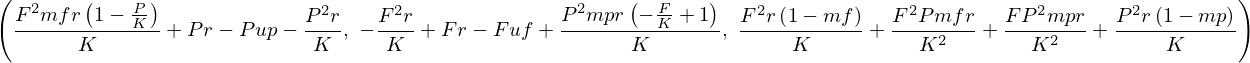

In [4]:
sp.diff(H,l1), sp.diff(H,l2), sp.diff(H,l3)

##### Adjoint Conditionals 

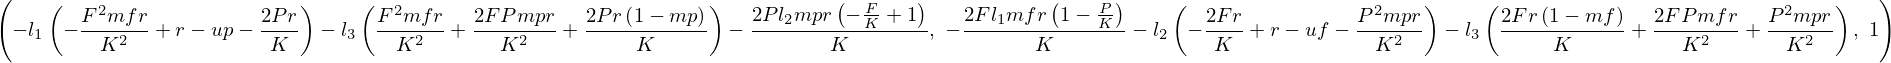

In [5]:
dl1 = (-1)*sp.diff(H,P)
dl2 = (-1)*sp.diff(H,F)
dl3 = (-1)*sp.diff(H,O)
dl1, dl2, dl3

##### Derivatives of the Controls

In [6]:
du1 = sp.diff(H,up)
du2 = sp.diff(H,uf)
du1, du2

$$ \frac{\partial H}{\partial u_p} > 0 \implies u_p = 1 \implies 2c_p < - P\lambda_1 $$
$$ \frac{\partial H}{\partial u_p} < 0 \implies u_p = 0 \implies - P\lambda_1 < 0 $$
$$ \frac{\partial H}{\partial u_p} = 0 \implies 0 \leq u_p \leq 1 \implies u_p = - \frac{P\lambda_1}{2c_p} \implies 0 \leq - P\lambda_1 \leq 2c_p $$

$$u_p = \max(0, \min(1,-\frac{P\lambda_1}{2c_p}))$$

$$ \frac{\partial H}{\partial u_f} > 0 \implies u_f = 1 \implies 2c_f < - F\lambda_2 $$
$$ \frac{\partial H}{\partial u_f} < 0 \implies u_f = 0 \implies - F\lambda_2 < 0 $$
$$ \frac{\partial H}{\partial u_f} = 0 \implies 0 \leq u_f \leq 1 \implies u_f = - \frac{F\lambda_2}{2c_f} \implies 0 \leq - F\lambda_1 \leq 2c_f $$

$$u_f = \max(0, \min(1,-\frac{F\lambda_2}{2c_f}))$$

In [7]:
from optimal_control_class import OptimalControl as OC

Iteration 1
The minimum is -3179.7458590510337
Iteration 2
The minimum is -2066.2068477919174
Iteration 3
The minimum is -452.26483396640816
Iteration 4
The minimum is -66.40172115215428
Iteration 5
The minimum is -1.39412323111962
Iteration 6
The minimum is -0.006180086232010284
Iteration 7
The minimum is -0.00045488766927575424
Iteration 8
The minimum is -0.00019217286901168792
Iteration 9
The minimum is -6.156148869010024e-05
Iteration 10
The minimum is 3.3745042601268714e-06


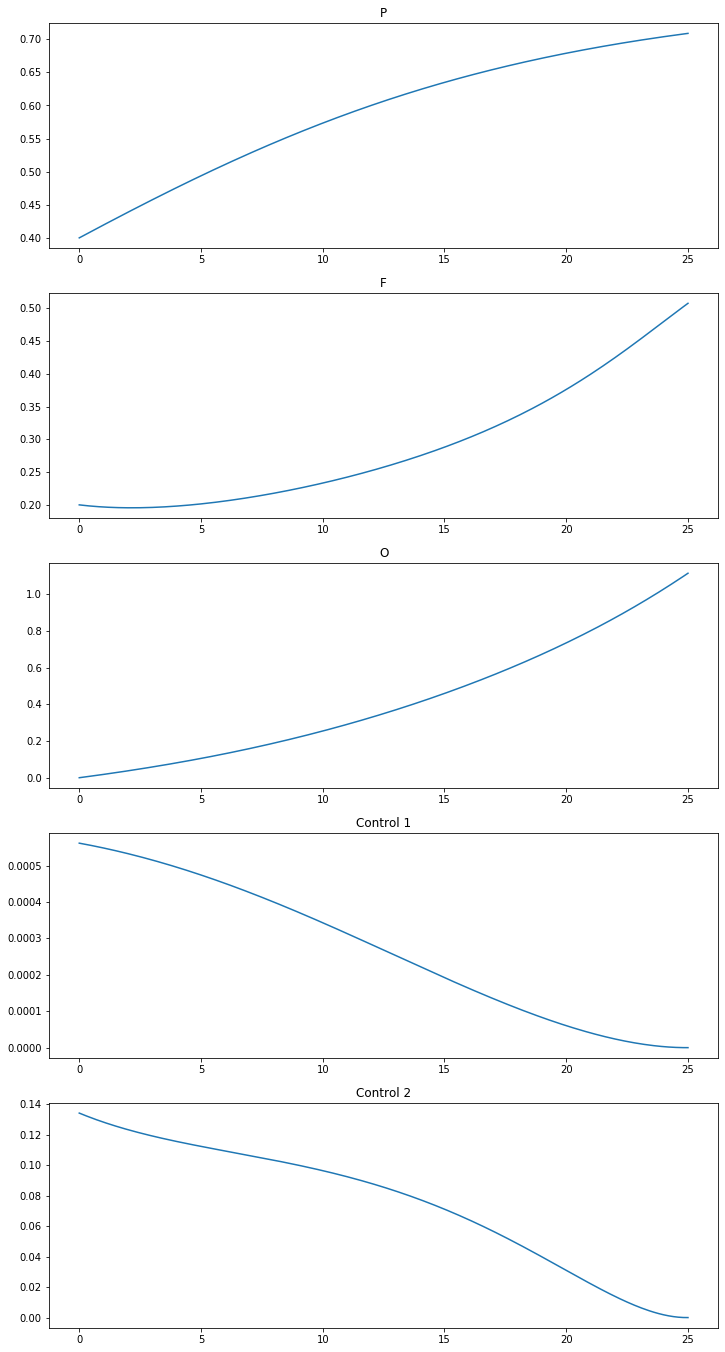

In [8]:
P, F, O, uf, up, l1, l2, l3, cp, cf, r, K, mf, mp, t = sp.symbols('P F O uf up l1 l2 l3 cp cf r K mf mp t')

H =  - O - cp*up**2 - cf*uf**2 + l1*(r*P - r*P**2/K + mf*(r/K)*(1 - P/K)*F**2 - up*P) + \
                               l2*(r*F - r*F**2/K + mp*(r/K)*(1 - F/K)*P**2 - uf*F) + \
                               l3*(r*(1 - mp)*P**2/K + r*(1 - mf)*F**2/K + mf*r*P*F**2/K**2 + mp*r*P**2*F/K**2)
sX = list(sp.symbols('P F O'))
sAdj = list(sp.symbols('l1 l2 l3'))
sU = list(sp.symbols('up uf'))
sConst = list(sp.symbols('K cf cp mf mp r'))
fU = [sp.Max(0,sp.Min(1, -sX[0]*sAdj[0]/(2*cp))), sp.Max(0,sp.Min(1, -sX[1]*sAdj[1]/(2*cf)))]
T = 25
final = [0,0,0]
initial = [0.4,0.2,0]
const = [0.75, 10, 10000, 0.5, 0.5, 0.1]
Problem = OC(H, sX, sAdj, sU, fU, sConst, const, T, initial, final)

X, U = Problem.plot('P','F','O')

In [ ]:
P, F, O, uf, up, l1, l2, l3, cp, cf, r, K, mf, mp, t = sp.symbols('P F O uf up l1 l2 l3 cp cf r K mf mp t')

H =  - O - cp*up**2 - cf*uf**2 + l1*(r*P - r*P**2/K + mf*(r/K)*(1 - P/K)*F**2 - up*P) + \
                               l2*(r*F - r*F**2/K + mp*(r/K)*(1 - F/K)*P**2 - uf*F) + \
                               l3*(r*(1 - mp)*P**2/K + r*(1 - mf)*F**2/K + mf*r*P*F**2/K**2 + mp*r*P**2*F/K**2)
sX = list(sp.symbols('P F O'))
sAdj = list(sp.symbols('l1 l2 l3'))
sU = list(sp.symbols('up uf'))
sConst = list(sp.symbols('K cf cp mf mp r'))
fU = [sp.Max(0,sp.Min(1, -sX[0]*sAdj[0]/(2*cp))), sp.Max(0,sp.Min(1, -sX[1]*sAdj[1]/(2*cf)))]
T = 25
final = [0,0,0]
initial = [0.4,0.2,0]
const = [5, 10, 10000, 0.5, 0.5, 0.1]
Problem = OC(H, sX, sAdj, sU, fU, sConst, const, T, initial, final)

X, U = Problem.plot('P','F','O')

Iteration 1
The minimum is -3134.362500000001
Iteration 2
The minimum is -959.8545902075607
Iteration 3
The minimum is -177.08733621501867
Iteration 4
The minimum is -26.136234621979916
Iteration 5
The minimum is -0.012499848848598158
Iteration 6
The minimum is -0.0006549245252304037
Iteration 7
The minimum is -0.00030131197681329357
Iteration 8
The minimum is -0.0001253791756678289
Iteration 9
